Step 1 : EDA

Load the liberaries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
data=pd.read_csv("Heart_Disease_Prediction.csv")

Explore the data type and structure

In [92]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [93]:
data.shape

(270, 14)

In [94]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

OneHote coding of column 12 (Heart disease)

Inport liberary

In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [97]:
data["Heart Disease"].unique()

array(['Presence', 'Absence'], dtype=object)

In [98]:
data["Heart Disease"]=labelencoder.fit_transform(data["Heart Disease"])

In [99]:
data["Heart Disease"].unique()

array([1, 0])

Step2: Neural Network

In [100]:
!pip install keras

Creat MLP inkeras

In [101]:
from keras.models import Sequential
from keras.layers import Dense


Fix random seed for reproducibility

In [102]:
seed=7
np.random.seed(seed)

Split dataset into input (x) and input (y) variables

In [103]:
x=data.iloc[:, 0:13]
y=data.iloc[:,13]

I checked the colloumn assigned to x and y.

In [104]:
print("Columns in x:", x.columns)
print("Columns in y", y.name)

Columns in x: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')
Columns in y Heart Disease


Create model

In [105]:
model=Sequential()
model.add(Dense(13,input_dim=13,activation='relu')) #1st layer
model.add(Dense(8,activation='relu')) #2nd layer
model.add(Dense(1,activation='sigmoid')) #3rd layer or top layer

Complete model

In [106]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit the model

In [107]:
history=model.fit(x,y,validation_split=0.33,epochs=100,batch_size=100)

Epoch 1/100
2/2 [==============================] - 1s 462ms/step - loss: 60.1682 - accuracy: 0.5444 - val_loss: 54.0818 - val_accuracy: 0.5778
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 56.6235 - accuracy: 0.5444 - val_loss: 50.7038 - val_accuracy: 0.5778
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 53.0239 - accuracy: 0.5444 - val_loss: 47.2773 - val_accuracy: 0.5778
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 49.3635 - accuracy: 0.5444 - val_loss: 43.8267 - val_accuracy: 0.5778
Epoch 5/100
2/2 [==============================] - 0s 53ms/step - loss: 45.9606 - accuracy: 0.5444 - val_loss: 40.3228 - val_accuracy: 0.5778
Epoch 6/100
2/2 [==============================] - 0s 51ms/step - loss: 42.2396 - accuracy: 0.5444 - val_loss: 36.8088 - val_accuracy: 0.5778
Epoch 7/100
2/2 [==============================] - 0s 37ms/step - loss: 38.4657 - accuracy: 0.5444 - val_loss: 33.2734 - val_accuracy: 0.5778
Epoch

Evaluate the model

In [108]:
scores=model.evaluate(x,y)

9/9 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.7222


In [109]:
print("%s,%.2f%%"%(model.metrics_names[1],scores[1]*100))

accuracy,72.22%


Visaulize the training history

List all data in history

In [110]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Summarize history for accuracy

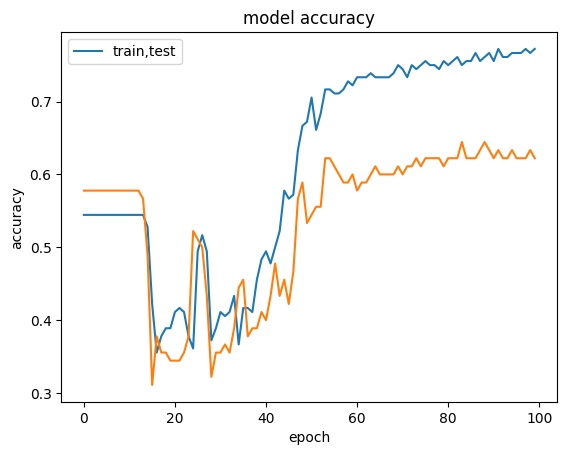

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train,test'],loc='upper left')
plt.show()

Summarize history for loss

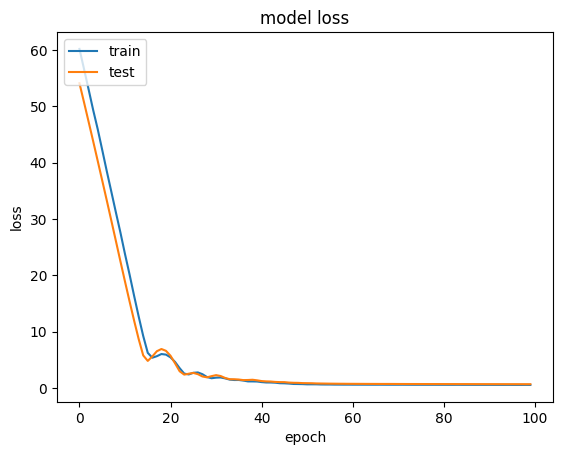

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()